Simple quick update latest weather

In [85]:
# Tell matplotlib to plot in line
%matplotlib inline

import datetime

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

def smooth(data, thresh=None):
    
    means = data.mean()

    if thresh is None:
        sds = data.std()
    else:
        sds = thresh
    
    delta = data - data.shift()
    
    good = delta[abs(delta) < sds]

    #print(good.describe())
    
    return delta.where(good, 0.0)


In [86]:
infile = "../files/kittycam_weather.csv"

!scp 192.168.0.128:Adafruit_Python_BMP/weather.csv $infile

weather.csv                                   100%  963KB 963.0KB/s   00:00    


In [87]:
!wc ../files/weather.csv

  564  1127 56016 ../files/weather.csv


In [88]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])

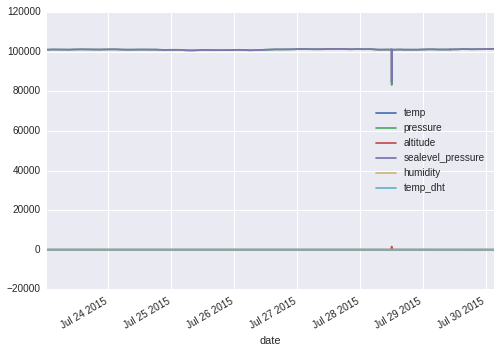

In [89]:
data.plot()

In [90]:
# smooth the data to filter out bad temps and pressures
data.altitude = (smooth(data.altitude, 5.0).cumsum() + data.altitude[0])
data.temp = (smooth(data.temp, 5.0).cumsum() + data.temp[0])

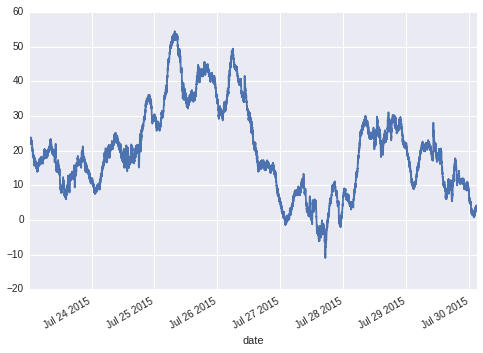

In [91]:
data.altitude.plot()

In [92]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,10017.000000,10017.000000,10017.000000,10017.000000,10016.000000,10016.000000
mean,26.871019,101120.090846,20.043638,101121.384946,80.892073,26.576128
std,1.655838,252.390864,12.840994,241.845133,7.143544,1.447791
min,23.900000,83203.000000,-10.957680,84724.000000,57.799999,23.700001
25%,25.500000,101033.000000,10.245356,101034.000000,76.900002,25.400000
50%,26.700000,101126.000000,18.498944,101127.000000,82.099998,26.500000
75%,27.800000,101262.000000,28.101301,101262.000000,85.900002,27.500000
max,32.300000,101518.000000,54.507673,101518.000000,94.300003,31.000000


## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [93]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

### Last 24 hours:

In [94]:
datetime.datetime.now()

datetime.datetime(2015, 7, 29, 23, 54, 40, 64812)

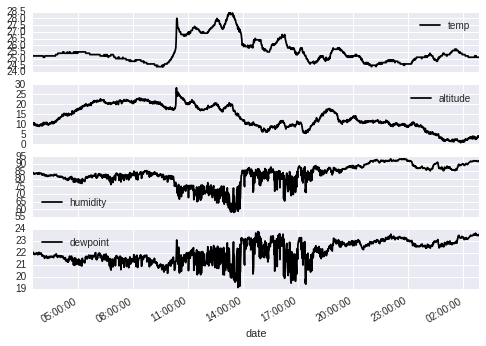

In [95]:
# reading is once a minute, so take last 24 * 60 readings
def plotem(data, n=-60):
    
    
    if n < 0:
        start = n
        end = len(data)
    else:
        start = 0
        end = n
        
    data[['temp', 'altitude', 'humidity', 'dewpoint']][n:].plot(subplots=True)
        
plotem(data, -24*60)

### July 29, 8pm BDA

This plot is interesting, the spike just after 10am (BDA - 3 hours) in temperature, just as there is a drop in pressure.

This coincided with the start of heavy rain.

The noise in the humidity coincides with the rain too.  The increase in humidity around 2pm looks to be at least part (mostly?) due to the temperature dropping.  The dewpoint remained steadier, this is a measure of the amount of moisture in the air.

Now the good news is the pressure looks to be rising a bit.  


### Last week

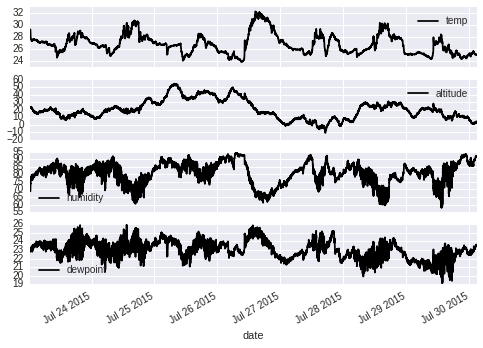

In [96]:
# reading is once a minute, so take last 7 * 24 * 60 readings
plotem(data, -7*24*60)

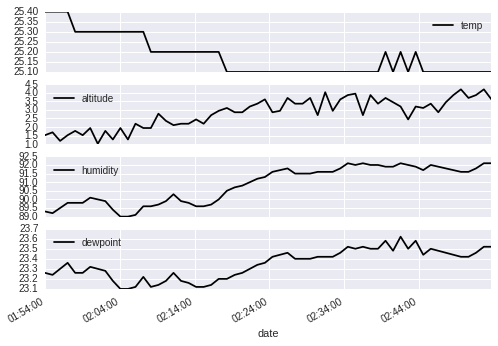

In [97]:
plotem(data)

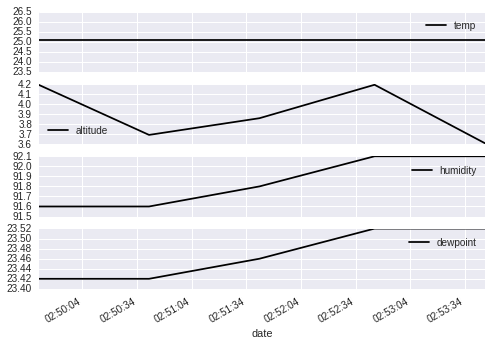

In [98]:
plotem(data, -5)

## Look at all the data

In [99]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht,dewpoint
count,10017.000000,10017.000000,10017.000000,10017.000000,10016.000000,10016.000000,10016.000000
mean,26.871019,101120.090846,20.043638,101121.384946,80.892073,26.576128,23.049161
std,1.655838,252.390864,12.840994,241.845133,7.143544,1.447791,1.004352
min,23.900000,83203.000000,-10.957680,84724.000000,57.799999,23.700001,19.120000
25%,25.500000,101033.000000,10.245356,101034.000000,76.900002,25.400000,22.380000
50%,26.700000,101126.000000,18.498944,101127.000000,82.099998,26.500000,23.060001
75%,27.800000,101262.000000,28.101301,101262.000000,85.900002,27.500000,23.760001
max,32.300000,101518.000000,54.507673,101518.000000,94.300003,31.000000,25.920000


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

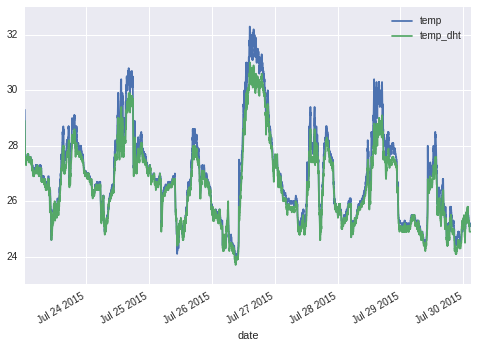

In [100]:
data[['temp', 'temp_dht']].plot()

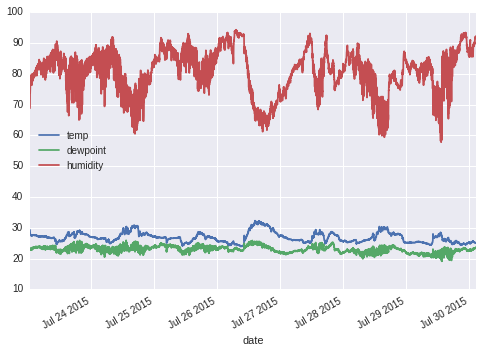

In [101]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff97ec2a20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7eff97f85048>], dtype=object)

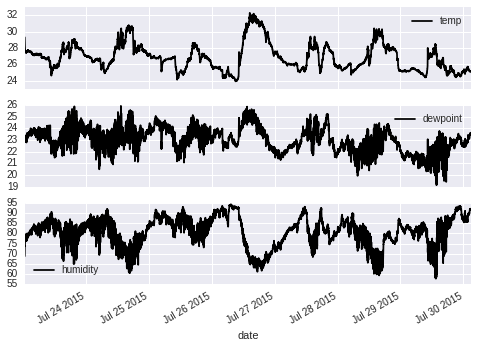

In [102]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)

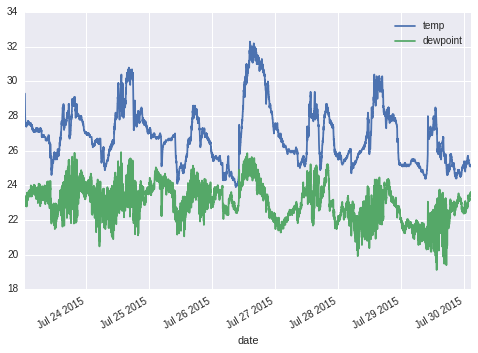

In [103]:
data[['temp', 'dewpoint']].plot()